In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from econml.dml import CausalForestDML 
from sklearn.linear_model import LassoCV

$$
y_i =  x_{4} + x_{3} + x_{2} + x_{1}(2D - 1) + \epsilon_i
$$
$$
x_1, x_2 \sim \mathcal{N}(0, 1)
$$
$$
pr(D = 1) = \frac{1}{2}
$$
$$
\epsilon \sim \mathcal{N}(0, 0.01)
$$



In [1]:
n=1000
p=[1./2, 1./2]
d = np.random.choice([0, 1], size=(n,1), p=p)
x1 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
x2 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
x3 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
x4 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))    
e = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))

d_1 = np.zeros((n,1))
ind = np.zeros((n,1))
ind[np.where(x1 >= 0)] = 2
y1 = np.add(d*-1, np.multiply(ind,d))
y2 = np.add(y1, x2)
y3 = np.add(y2, x3)
y4 = np.add(y2, x4)
y = np.add(y4, e)



X = np.concatenate((x1,x2), axis=1)
X = np.concatenate((X,x3), axis=1)
X = np.concatenate((X,x4), axis = 1)
X = np.concatenate((X,d), axis = 1)

data = pd.DataFrame({'y': y[:,0], 'X1': x1[:,0], 'd': d[:,0]}, columns=['y', 'X1', 'd'])
print(data['y'][(data['X1'] > 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] > 0) & (data['d'] == 0)].mean())
print(data['y'][(data['X1'] < 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] < 0) & (data['d'] == 0)].mean())
print(data['y'][data['d'] == 1].mean() - data['y'][data['d'] == 0].mean())

NameError: name 'np' is not defined

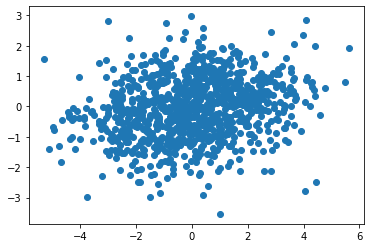

In [39]:
import matplotlib.pyplot as plt
plt.scatter(data['y'], data['X1'])

In [10]:
n=10
p=[1./2, 1./2]
d = np.random.choice([0, 1], size=(n,1), p=p)
x1 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
x2 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
x3 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
x4 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))    
e = np.random.normal(loc = 0.0, scale = 0.1, size = (n,1))
print(x1)
ind = np.zeros((n,1))
ind[np.where(x1 >= 0)] = 2
y1 = np.add(d*-1, ind)
print(ind)
print(y1)

[[-0.08734815]
 [-0.1633942 ]
 [-0.57110389]
 [ 0.47045967]
 [-1.15843119]
 [-0.03868389]
 [ 1.00041182]
 [ 2.34566628]
 [ 0.37159906]
 [ 2.28634873]]
[[0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]]
[[-1.]
 [-1.]
 [-1.]
 [ 2.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]]


In [26]:
ymean = []
y_tr = []
y_c = []

n = 1000

X, y = dgp1(n)
for i in range(100):
    #p=[1,0]
    data = pd.DataFrame({'y': y[:,0], 'X1': X[:,0], 'X2': X[:,1], 'X3': X[:,2], 'X4': X[:,3], 'd': X[:,4]}, columns=['y', 'X1', 'X2', 'X3', 'X4', 'd'])
    ymean.append(np.mean(y))
    y_c.append(data.groupby('d').mean().iloc[0,0])
    y_tr.append(data.groupby('d').mean().iloc[1,0])

print(np.mean(ymean))
print(np.mean(y_tr))
print(np.mean(y_c))
print(np.mean(y_tr) - np.mean(y_c))

5.837208146837043
7.987146839000555
3.97606718944176
4.011079649558795


In [6]:
n = 1000
output = dgp1(n)



x = output[0]
y = output[1][:,0]
X= x[:,0:3]
d = x[:,4]
y.shape

1.6525350898708577
-1.5985585658963828
-0.006110228899574285


In [188]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
est = CausalForestDML(discrete_treatment = True, honest = False)


In [189]:
# Use defaults

#est = CausalForestDML()
# Or specify hyperparameters
#est = CausalForestDML(criterion='het', n_estimators=500,       
est.fit(Y = y_train, T = X_train[:,4], X = X_train[:,0:3], W = X_train[:,0].reshape(-1,1))
treatment_effects = est.effect(X = X_test[:,0:3])
est.ate(X_test[:,0:3])

# Confidence intervals via Bootstrap-of-Little-Bags for forests
#lb, ub = est.effect_interval(X_test, alpha=0.05)

In [190]:
data = pd.DataFrame({'y': y_test, 'X1': X_test[:,0], 'X2': X_test[:,1], 'X3': X_test[:,2], 'X4': X_test[:,3], 'd': X_test[:,4], 'treatment': treatment_effects}, columns=['y', 'X1', 'X2', 'X3', 'X4', 'd', 'treatment'])

In [191]:
print(data['y'][(data['X1'] > 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] > 0) & (data['d'] == 0)].mean())
print(data['treatment'][data['X1'] > 0].mean())
print(data['y'][(data['X1'] < 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] < 0) & (data['d'] == 0)].mean())
print(data['treatment'][data['X1'] < 0].mean())

1.8995674200103054
1.51677739756326
-1.6479743146799026
-1.4042869405440142


In [ ]:
print(data['y'][(data['X1'] > 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] > 0) & (data['d'] == 0)].mean())
print(data['treatment'][data['X1'] > 0].mean())
print(data['y'][(data['X1'] < 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] < 0) & (data['d'] == 0)].mean())
print(data['treatment'][data['X1'] < 0].mean())

In [76]:
data = pd.DataFrame({'y': y, 'X1': x[:,0], 'X2': x[:,1], 'X3': x[:,2], 'X4': x[:,3], 'd': x[:,4]}, columns=['y', 'X1', 'X2', 'X3', 'X4', 'd'])

In [192]:
!pip install causal_tree_learn

  Running setup.py clean for causal-tree-learn
Failed to build causal-tree-learn
    Running setup.py install for causal-tree-learn: started
    Running setup.py install for causal-tree-learn: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\miniconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-e0sby0vx\\causal-tree-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-e0sby0vx\\causal-tree-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-9jtv1qhh'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-e0sby0vx\causal-tree-learn\
  Complete output (59 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\CTL
  copying CTL\causal_learn_forest.py -> build\lib.win-amd64-3.8\CTL
  copying CTL\causal_tree_learn.py -> build\lib.win-amd64-3.8\CTL
  copying C

In [92]:
data[(data['X1'] >= 0) & (data['d'] == 0)].mean()

y    -1.015860
X1    0.722177
X2   -0.158575
X3   -0.008555
X4   -0.119901
d     0.000000
dtype: float64

In [91]:
data[(data['X1'] >= 0) & (data['d'] == 1)].mean()

y     0.765018
X1    0.790393
X2   -0.059255
X3    0.015546
X4    0.017423
d     1.000000
dtype: float64

In [65]:
ind = np.arange(0,1001,100)

In [66]:
tr_effect = 

for i in ind:
    group1 = data.sort_values('X1').iloc[0:50,:].groupby('d').mean()

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [57]:

for group in groups:
    group = data.sort_values('X1').iloc[0:50,:].groupby('d').mean()
    

#group1 = data.sort_values('X1').iloc[0:50,:].groupby('d').mean()
#group1.iloc[1,0] - group1.iloc[0,0]

#group2 = data.sort_values('X1', ).iloc[951:1000,:].groupby('d').mean()
#group2.iloc[1,0] - group2.iloc[0,0]

In [59]:
group4

NameError: name 'group4' is not defined

In [39]:
data

,y,X1,X2,X3,X4,d
0,7.184318,1.619186,-0.254367,3.171748,2.714515,1.0
1,1.844627,2.488007,0.906587,1.557453,2.109126,0.0
2,5.184794,1.710653,2.789343,2.002710,2.017344,0.0
3,6.694567,1.457442,4.222509,1.420900,2.537927,0.0
4,5.463259,3.289246,1.104380,0.374801,0.603647,1.0
...,...,...,...,...,...,...
995,6.759141,0.239587,3.180672,1.233549,2.088545,1.0
996,7.116321,2.208633,1.440201,0.388810,3.091263,1.0
997,7.937752,1.594249,1.864176,2.140619,2.226595,1.0
998,7.683668,1.866366,0.605955,3.404792,1.832761,1.0


In [169]:
p=[1./2, 1./2]
n=1000
x1 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
print(x1.mean())
print(x1[x1<0].mean())
print(x1[x1>0].mean())
d = np.random.choice([0, 1], size=(n,1), p=p)

y = np.multiply(x1, np.subtract(2.5*d, 1.5))

data = pd.DataFrame({'y': y[:,0], 'X1': x1[:,0], 'd': d[:,0]}, columns=['y', 'X1', 'd'])
print(data['y'][(data['X1'] > 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] > 0) & (data['d'] == 0)].mean())
print(data['y'][(data['X1'] < 0) & (data['d'] == 1)].mean() - data['y'][(data['X1'] < 0) & (data['d'] == 0)].mean())

-0.03694611177216052
-0.8061380812713191
0.8098114344832158
2.0209889114636055
-2.010411764839589


In [128]:
x7 = np.random.normal(loc = 0.0, scale = 1.0, size = (10,1))
print(x7)
np.subtract(10*x7, 1)




[[-0.44532081]
 [ 2.13278049]
 [ 0.27336673]
 [-0.89893782]
 [-0.19835702]
 [ 0.17161257]
 [ 0.22307574]
 [-0.58401578]
 [-0.95896485]
 [-1.40065054]]


array([[ -5.45320806],
       [ 20.32780489],
       [  1.73366729],
       [ -9.98937822],
       [ -2.98357018],
       [  0.71612566],
       [  1.23075742],
       [ -6.84015783],
       [-10.58964848],
       [-15.0065054 ]])

In [101]:
def avg_positive_speed(speed):
    s = np.array(speed)
    positives = s > 0
    if positives.any():
        return s[positives].mean()
    else:
        return 0.


print(avg_positive_speed(x1))
# prints 2.0


0.781101258887606


In [151]:
1/0.8